In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lib.stats.stats as st
import lib.annotation.Result_Prep as rp
import config.config as conf
import matplotlib as mpl
import matplotlib.lines as mlines


INFO 12-18 17:03:19 [__init__.py:216] Automatically detected platform cuda.


# Question Difficulty Calculation 

In [3]:
path = conf.LLM_RESULT
file_list = os.listdir(path)

In [4]:
r_p = rp.Result_Prep()

In [5]:
ver_list = sorted([y for y in [x for x in file_list if x.isdigit()] if (int(y)>=11110000) & (int(y)<=98880000)])

In [6]:
tot_calc = pd.DataFrame()
for listid in ver_list:
    df = r_p.make_one_file(listid)
    if isinstance(df, pd.core.frame.DataFrame):
        df = r_p.pp_df(df, 5)
        df = r_p.calc_rate_byweek(df)
        tot_calc = pd.concat([tot_calc, df], axis = 0)

    

In [7]:
m_chk_cnt_0 = tot_calc[tot_calc['o_result'] =='0']
m_chk_cnt_1 = tot_calc[tot_calc['o_result'] =='1']
m_chk_cnt_2 = tot_calc[tot_calc['o_result'] =='2']

In [8]:
print(m_chk_cnt_0.loc[m_chk_cnt_0['o_result'].isna(), 'rate'])
print(m_chk_cnt_1.loc[m_chk_cnt_1['o_result'].isna(), 'rate'])
print(m_chk_cnt_2.loc[m_chk_cnt_2['o_result'].isna(), 'rate'])

Series([], Name: rate, dtype: float64)
Series([], Name: rate, dtype: float64)
Series([], Name: rate, dtype: float64)


In [9]:
m_chk_cnt_0.loc[:, 'o_result'] = '0'
m_chk_cnt_1.loc[:, 'o_result'] = '1'
m_chk_cnt_2.loc[:, 'o_result'] = '2'

In [10]:
m_chk_cnt_0.head()

,rel_week,o_result,r_cnt,tot_cnt,rate
0,-53.0,0,4,20,20.000000
3,-52.0,0,41,136,30.147059
6,-51.0,0,34,149,22.818792
9,-50.0,0,34,137,24.817518
12,-49.0,0,39,136,28.676471


In [11]:
st_0 = st.Stats(m_chk_cnt_0['rel_week'].values, m_chk_cnt_0['rate'].values, 2, 0.95)
st_1 = st.Stats(m_chk_cnt_1['rel_week'].values, m_chk_cnt_1['rate'].values, 2, 0.95)
st_2 = st.Stats(m_chk_cnt_2['rel_week'].values, m_chk_cnt_2['rate'].values, 2, 0.95)

In [12]:
F_stat_0, p_value_0 = st_0.chow_test()
F_stat_1, p_value_1 = st_1.chow_test()
F_stat_2, p_value_2 = st_2.chow_test()

In [13]:
x_0 = m_chk_cnt_0['rel_week'].values
y_0 = m_chk_cnt_0['rate'].values

split_idx = np.argmax(np.where(x_0 < 0))+1
x_0_1 = x_0[:split_idx]
x_0_2 = x_0[split_idx:]

In [14]:
x_1 = m_chk_cnt_1['rel_week'].values
y_1 = m_chk_cnt_1['rate'].values

split_idx = np.argmax(np.where(x_1 < 0))+1
x_1_1 = x_1[:split_idx]
x_1_2 = x_1[split_idx:]

In [15]:
x_2 = m_chk_cnt_2['rel_week'].values
y_2 = m_chk_cnt_2['rate'].values

split_idx = np.argmax(np.where(x_2 < 0))+1
x_2_1 = x_2[:split_idx]
x_2_2 = x_2[split_idx:]


# Code complexity calculation

In [16]:
with open(f'{conf.DATA_PATH}/data/cc_python_raw_df.pkl', 'rb') as f:
    calc_ed_com_df = pickle.load(f)

In [17]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0
...,...,...,...,...,...,...,...
940792,77356328,2023-10-25,13707,import fitz # PyMuPDF library\nimport tkinter...,13707_77356328.py,13707_77356328.py,0.0
940795,77356332,2023-10-25,13710,from datetime import datetime\nimport pandas a...,13710_77356332.py,13710_77356332.py,0.0
940798,77356352,2023-10-25,13713,"import re\nre.match(r'^-?\d{1,3}[,.](\d{3}[,.]...",13713_77356352.py,13713_77356352.py,0.0
940799,77356372,2023-10-25,13714,"from tkinter import Tk, Canvas, Button, Checkb...",13714_77356372.py,13714_77356372.py,2.0


In [18]:
calc_ed_com_df['rel_week'] = np.floor((pd.to_datetime(calc_ed_com_df['cdate'])- datetime.datetime(2022,11,30)).dt.days/7)


In [19]:
calc_ed_com_df[(calc_ed_com_df['rel_week']>=-52)&(calc_ed_com_df['rel_week']<52)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 293704 entries, 0 to 940800
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    293704 non-null  int64  
 1   cdate                 293704 non-null  object 
 2   idx                   293704 non-null  int64  
 3   src                   293704 non-null  object 
 4   Path                  293704 non-null  object 
 5   File Name             293704 non-null  object 
 6   Cognitive Complexity  293704 non-null  float64
 7   rel_week              293704 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 20.2+ MB


In [20]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['rel_week']).mean(numeric_only=True).reset_index()

In [21]:
calc_ed_com_mean_df.head()

,rel_week,id,idx,Cognitive Complexity
0,-100.0,6.555671e+07,390480.428283,1.130909
1,-99.0,6.564128e+07,379233.726323,1.047586
2,-98.0,6.574825e+07,384568.220445,1.087390
3,-97.0,6.585632e+07,367778.865407,0.901617
4,-96.0,6.596760e+07,355703.084840,0.979995


In [22]:
chow_df = calc_ed_com_mean_df[['rel_week', 'Cognitive Complexity']]

In [23]:
chow_df = chow_df[(chow_df['rel_week']>=-52)&(chow_df['rel_week']<52)]

In [24]:
x = chow_df['rel_week'].values

In [25]:
chow_df_1year = chow_df[chow_df['rel_week']>=-52]
st_chow_1year = st.Stats(chow_df_1year['rel_week'].values, chow_df_1year['Cognitive Complexity'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


In [26]:
x = chow_df_1year['rel_week'].values
y = chow_df_1year['Cognitive Complexity'].values

split_idx = np.argmax(np.where(x < 0))+1
x1= x[:split_idx]
x2= x[split_idx:]

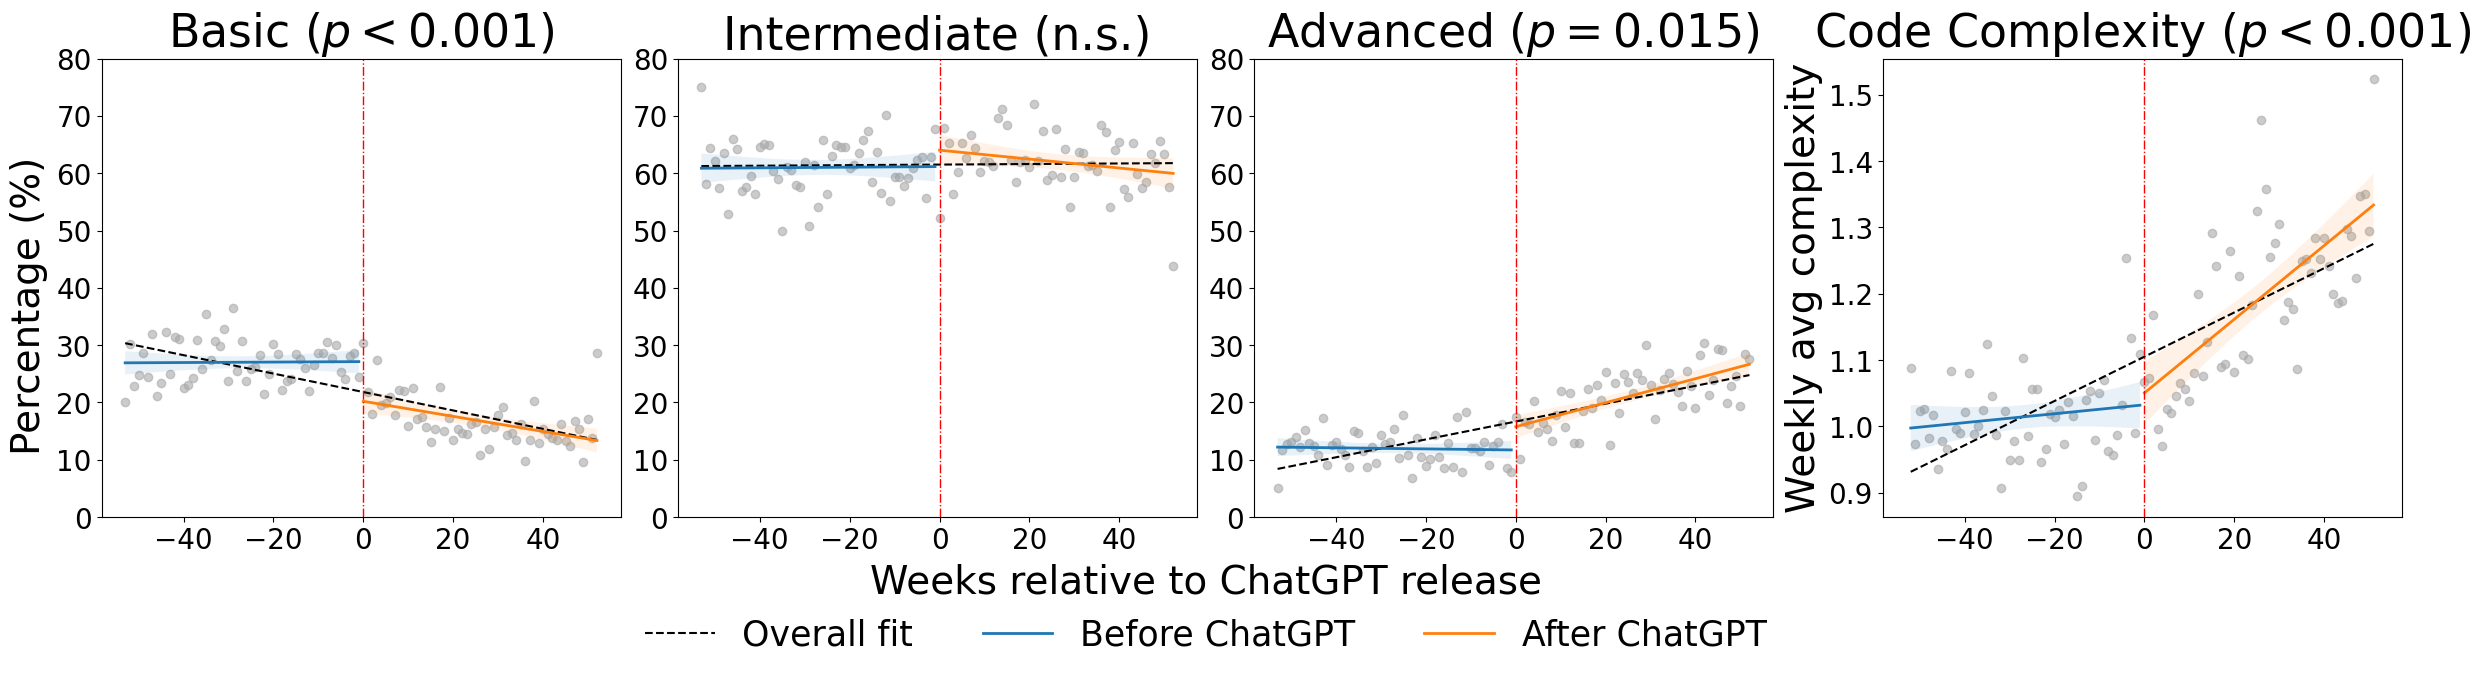

In [27]:
### create a figure with multiple subplots
sharey = True 
sharex = True 

fig, axs = plt.subplots(1, 4, figsize = (24, 6), sharex=sharex, constrained_layout=True)


axs[0].scatter(x_0, y_0,  alpha=0.6, color='darkgray')
axs[0].plot(x_0, st_0.y_predict, label="Overall Fit", linestyle="--", color="black")  
axs[0].plot(x_0_1, st_0.y1_predict, label="before ChatGPT", linewidth='2')
axs[0].fill_between(x_0_1, st_0.y1_predict - st_0.y1_conf_interval, st_0.y1_predict + st_0.y1_conf_interval, alpha=0.1)
axs[0].plot(x_0_2, st_0.y2_predict, label="after ChatGPT", linewidth='2')
axs[0].fill_between(x_0_2, st_0.y2_predict - st_0.y2_conf_interval, st_0.y2_predict + st_0.y2_conf_interval, alpha=0.1)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].set_title(f"Basic ($p < 0.001$)", fontsize=33)
axs[0].set_ylim(0, 80) 


axs[1].scatter(x_1, y_1,  alpha=0.6, color='darkgray')
axs[1].plot(x_1, st_1.y_predict, label="Overall fit", linestyle="--", color="black")  
axs[1].plot(x_1_1, st_1.y1_predict, label="Before ChatGPT", linewidth='2')
axs[1].fill_between(x_1_1, st_1.y1_predict - st_1.y1_conf_interval, st_1.y1_predict + st_1.y1_conf_interval, alpha=0.1)
axs[1].plot(x_1_2, st_1.y2_predict, label="After ChatGPT", linewidth='2')
axs[1].fill_between(x_1_2, st_1.y2_predict - st_1.y2_conf_interval, st_1.y2_predict + st_1.y2_conf_interval, alpha=0.1)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].set_title(f"Intermediate (n.s.)", fontsize=33)
axs[1].grid(False)
axs[1].set_ylim(0, 80)

axs[2].scatter(x_2, y_2,  alpha=0.6, color='darkgray')
axs[2].plot(x_2, st_2.y_predict, label="Overall fit", linestyle="--", color="black")  
axs[2].plot(x_2_1, st_2.y1_predict, label="Before ChatGPT", linewidth='2')
axs[2].fill_between(x_2_1, st_2.y1_predict - st_2.y1_conf_interval, st_2.y1_predict + st_2.y1_conf_interval, alpha=0.1)
axs[2].plot(x_2_2, st_2.y2_predict, label="After ChatGPT", linewidth='2')
axs[2].fill_between(x_2_2, st_2.y2_predict - st_2.y2_conf_interval, st_2.y2_predict + st_2.y2_conf_interval, alpha=0.1)
axs[2].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[2].set_title(f"Advanced ($p = 0.015$)", fontsize=33)
axs[2].set_ylim(0, 80)


axs[3].scatter(x, y,  alpha=0.6, color='darkgray')
axs[3].plot(x, st_chow_1year.y_predict, label="Overall fit", linestyle="--", color="black")  
axs[3].plot(x1, st_chow_1year.y1_predict, label="Before ChatGPT", linewidth='2')
axs[3].fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.1)
axs[3].plot(x2, st_chow_1year.y2_predict, label="After ChatGPT", linewidth='2')
axs[3].fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.1)
axs[3].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[3].set_title(f"Code Complexity ($p < 0.001$)", fontsize=33)

axs[0].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='x', labelsize=20)
axs[2].tick_params(axis='x', labelsize=20)
axs[3].tick_params(axis='x', labelsize=20)

axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)
axs[3].tick_params(axis='y', labelsize=20)

axs[3].set_ylabel("Weekly avg complexity", fontsize=28)
fig.supxlabel("Weeks relative to ChatGPT release", fontsize=28) 
fig.supylabel("Percentage (%)", fontsize=28)


# release_line = mlines.Line2D([], [], color='red', linestyle='--', label='ChatGPT Release')
handles, labels = axs[2].get_legend_handles_labels()
# handles.append(release_line)
labels.append("ChatGPT Release")
fig.legend(
    handles=handles,
    labels=labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.13),
    ncol=4,
    fontsize=25,
    frameon=False
)
fig.subplots_adjust(bottom=0.15)  # 하단 여백 확보

# fig.tight_layout()
fig.savefig("./fig/C_Result_Fig1.png", dpi=300, bbox_inches='tight')  # DPI 설정 및 여백 최소화
plt.show();